<a href="https://colab.research.google.com/github/zee404-code/DartsTimeSeries/blob/main/darts02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
############################# QUICK START #############################
## INSTALLING DARTS ##
!pip install darts

In [ ]:
## IMPORTING ##
%matplotlib inline 
## not needed

import pandas as pd ## it wasn't really neccessary
import numpy as np ## not neccessary
import matplotlib.pyplot as plt ## not neccessary

from darts import TimeSeries ## it was running without this as well
from darts.datasets import HeartRateDataset
#heart rate dataset is univariate, almost all forecasting models could be tried out

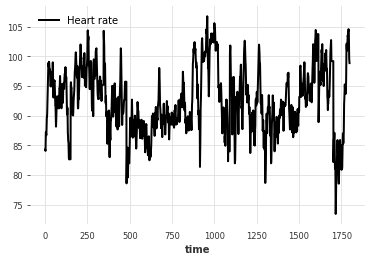

In [ ]:
##dont have to bother creating timeseries using DataFrame etc like were doing for BTC

## load() function

series = HeartRateDataset().load()
series.plot()

In [ ]:
## TIMESERIES OPERATIONS ##
# 1 - split
# 2 - slice
# 3 - arithmetic operations
# 4 - stacking
# 5 - mapping
# 6 - mapping both timeseries and values
# 7 - yielding a multivariate series
# 8 - adding binary components
# 9 - differencing (can do multiple times)
# 10 - filling missing values - utils function - uses np.nan 

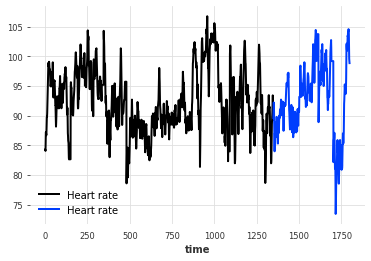

In [ ]:
# 1 - split
series1, series2 = series.split_before(0.75)
series1.plot()
series2.plot()

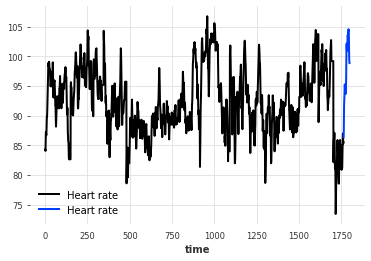

In [ ]:
# 2 - slice
series1, series2 = series[:-36], series[-36:]
series1.plot()
series2.plot()
## -ve values are from the right end, +ve values from the left

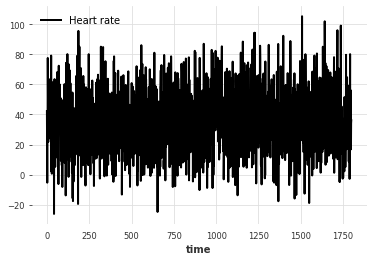

In [ ]:
# 3 - arithmetic operations
series_noise = TimeSeries.from_times_and_values(
    series.time_index, np.random.randn(len(series))
)
(series / 2 + 20 * series_noise - 10).plot()

##noise are random fluctutaions about its typical pattern

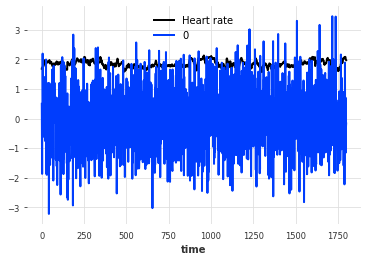

In [ ]:
# 4 - stacking    -> basically Concatenating a new dimension to produce a new single multivariate series.
(series / 50).stack(series_noise).plot()

In [ ]:
# 5 - mapping
series.map(np.log).plot()

In [ ]:
series.map(np.log)

<TimeSeries (DataArray) (time: 1800, component: 1, sample: 1)>
array([[[4.43402237]],

       [[4.43402237]],

       [[4.43155343]],

       ...,

       [[4.60083982]],

       [[4.59697167]],

       [[4.59367133]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 6 ... 1793 1794 1795 1796 1797 1798 1799
  * component  (component) object 'Heart rate'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
# 6 - mapping both timeseries and values
##series.map(lambda ts, x: x / ts.time).plot() not working out
# 7 - yielding a multivariate series
#(series / 20).add_datetime_attribute("month").plot()
# 8 - adding binary components
#(series / 200).add_holidays("US").plot()

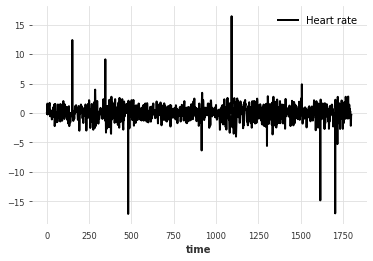

In [ ]:
# 9 - differencing (can do multiple times)
series.diff().plot()

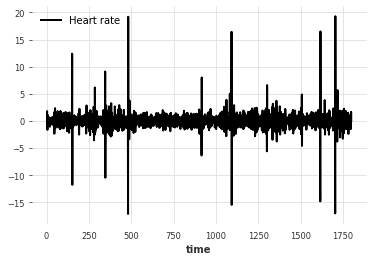

In [ ]:
series.diff().diff().plot()

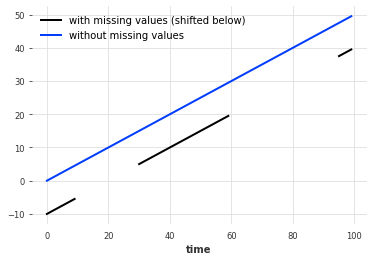

In [ ]:
# 10 - filling missing values - utils function - uses np.nan 
from darts.utils.missing_values import fill_missing_values

values = np.arange(50, step=0.5)
values[10:30] = np.nan
values[60:95] = np.nan
series_ = TimeSeries.from_values(values)

(series_ - 10).plot(label="with missing values (shifted below)")
fill_missing_values(series_).plot(label="without missing values")

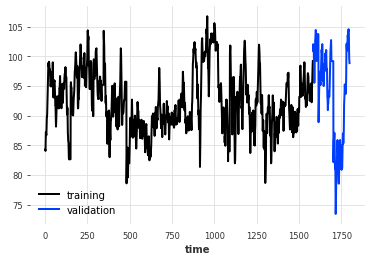

In [ ]:
##### TRAINING AND VALIDATION #####
train, val = series.split_before(0.88) # (__) could also have pd.timestamp as well
train.plot(label="training")
val.plot(label="validation")

In [ ]:
########### main thing is that we're training forecasting models and then making predictions

In [ ]:
#inspecting seasonality
#computing error metrics
#backtesting
#ensembling models
#filtering models

ARIMA(12, 1, 0)


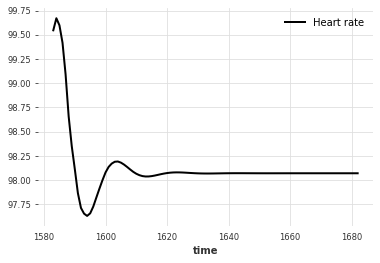

In [ ]:
############################## FORECASTING MODELS ##############################
from darts.models import ARIMA
model = ARIMA()
print(model) ## 12, 1, 0 -> default parameters, however could fine tune these
model.fit(train)
pred = model.predict(n=100) # n is the no. of time stamps to predict
#cant do model.plot()
pred.plot()

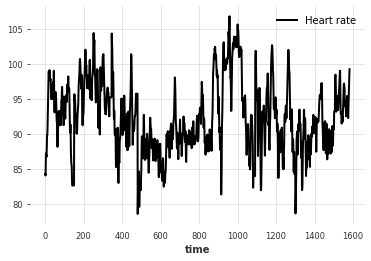

In [ ]:
train.plot()

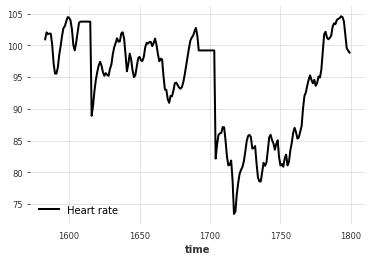

In [ ]:
val.plot()

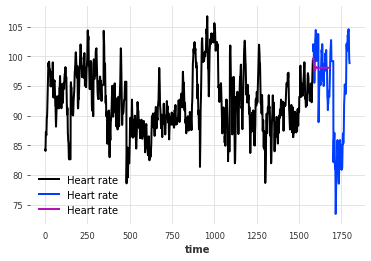

In [ ]:
train.plot()
val.plot()
pred.plot()

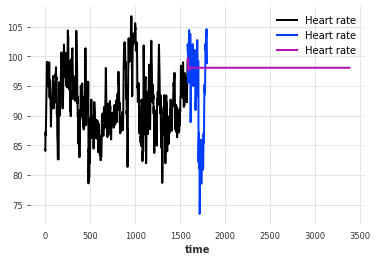

In [ ]:
pred2 = model.predict(n=1800)
train.plot()
val.plot()
pred2.plot()

##isnt giving out correct predictions, is it because its being loaded on default parameters?

In [ ]:
#from darts.models import AutoARIMA, ARIMA, SARIMA
from darts.metrics import mape
print(mape(series, ARIMA))

AttributeError: ignored